# Instanciando pacotes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from utils.column_analysis import column_analysis

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

In [2]:
import yaml

def add_outlier_column(column_name, yaml_path='../src/config/config.yaml'):
    # carrega o yaml
    with open(yaml_path, 'r') as file:
        config = yaml.safe_load(file)
    
    # verifica se a coluna já está em 'outliers'
    if column_name not in config['outliers']:
        config['outliers'].append(column_name)
    
        # atualiza o yaml
        with open(yaml_path, 'w') as file:
            yaml.safe_dump(config, file)
        
        print(f"Coluna '{column_name}' adicionada aos outliers.")
    else:
        print(f"A coluna '{column_name}' já está na lista de outliers.")

# Carregamento dos dados

In [3]:
DATA_PATH = r'../data/raw/base_desafio_cartola.xlsx'

df_raw = pd.read_excel(DATA_PATH)
print('shape', df_raw.shape)
df_raw.head(3)

shape (50689, 1)


,"user,sexo,uf,idade,dias,pviews,visitas,tempo_total,device,futebol,futebol_intenacional,futebol_olimpico,blog_cartola,atletismo,ginastica,judo,natacao,basquete,handebol,volei,tenis,canoagem,saltos_ornamentais,home,home_olimpiadas,cartola_status"
0,"1912357,NA,NA,NA,12,31,20,3868.476999759674,pc..."
1,"1914630,NA,NA,NA,2,8,5,427.35199999809265,pc_o..."
2,"1915241,NA,NA,NA,14,44,23,14758.755000114441,p..."


## Organizando a estrutura do dataframe raw

In [4]:
# convertendo a primeira linha em uma lista com o nome de cada coluna
colunas = df_raw.columns[0].split(',')
print('quantidade de colunas:', len(colunas))
colunas[:5]

quantidade de colunas: 26


['user', 'sexo', 'uf', 'idade', 'dias']

In [5]:
# pegamos todas as linhas da primeira coluna do df e usamos list comprehension para fazer o split dos valores com vírgula
df_clean = pd.DataFrame([x.split(',') for x in df_raw.iloc[:, 0]]
                        , columns=colunas)
print('shape', df_clean.shape)
df_clean.head(3)

shape (50689, 26)


,user,sexo,uf,idade,dias,pviews,visitas,tempo_total,device,futebol,futebol_intenacional,futebol_olimpico,blog_cartola,atletismo,ginastica,judo,natacao,basquete,handebol,volei,tenis,canoagem,saltos_ornamentais,home,home_olimpiadas,cartola_status
0,1912357,NA,NA,NA,12,31,20,3868.476999759674,pc_e_m,0,0,45,0,90,2627.2339997291565,180.64800000190735,0,0,0,46.8510000705719,0,0,0,0,606.4270000457764,NÃ£o Cartola
1,1914630,NA,NA,NA,2,8,5,427.35199999809265,pc_only,201.33799982070923,45,45,0,0,0,0,0,0,0,45,0,0,0,0,0,NÃ£o Cartola
2,1915241,NA,NA,NA,14,44,23,14758.755000114441,pc_e_m,4867.996999979019,0,1331.5439999103546,0,1835.473000049591,0,972.9390001296997,90,0,2471.0930001735687,300.57299995422363,0,1956.6979999542236,431.6159999370575,0,91.72099995613098,NÃ£o Cartola


In [6]:
df_clean['cartola_status'].astype(object)

0        NÃ£o Cartola
1        NÃ£o Cartola
2        NÃ£o Cartola
3        Cartola Free
4        NÃ£o Cartola
             ...     
50684    Cartola Free
50685    Cartola Free
50686              NA
50687              NA
50688              NA
Name: cartola_status, Length: 50689, dtype: object

# Transformação

## dtype das colunas

In [7]:
df_clean.dtypes

user                    object
sexo                    object
uf                      object
idade                   object
dias                    object
pviews                  object
visitas                 object
tempo_total             object
device                  object
futebol                 object
futebol_intenacional    object
futebol_olimpico        object
blog_cartola            object
atletismo               object
ginastica               object
judo                    object
natacao                 object
basquete                object
handebol                object
volei                   object
tenis                   object
canoagem                object
saltos_ornamentais      object
home                    object
home_olimpiadas         object
cartola_status          object
dtype: object

Preciso entender melhor os valores presentes em cada campo para criar estratégias de qual será o melhor formato a ser atribuído.

Criei uma função que permite realizar varias análises conforme a necessidade.

In [8]:
column_analysis(df_clean, 'sexo', methods=['unique', 'value_counts'])

Quantidade de valores únicos: 3
['NA' 'M' 'F']
--------------------------------------------------
Value counts: sexo
NA    28249
M     20141
F      2299
Name: count, dtype: int64


In [9]:
column_analysis(df_clean, 'uf', methods=['value_counts'])

--------------------------------------------------
Value counts: uf
NA                     29130
Sao Paulo               6659
Rio de Janeiro          3358
Minas Gerais            2357
Parana                  1187
Rio Grande do Sul       1176
Bahia                   1042
Santa Catarina           787
Pernambuco               723
Distrito Federal         509
Espirito Santo           475
Ceara                    465
Goias                    430
Paraiba                  332
Rio Grande do Norte      276
Maranhao                 219
Mato Grosso              212
Alagoas                  203
Mato Grosso do Sul       202
Para                     198
Piaui                    168
Sergipe                  131
Amazonas                 119
Rondonia                  92
Tocantins                 75
Fora do Brasil            62
Acre                      47
Amapa                     37
Roraima                   18
Name: count, dtype: int64


In [10]:
column_analysis(df_clean, 'idade', methods=['unique', 'numeric_nulls', 'negative_values', 'zero_values'])

Quantidade de valores únicos: 100
['NA' '38' '59' '42' '49' '50' '28' '39' '30' '27' '34' '32' '33' '29'
 '19' '24' '37' '40' '55' '25' '31' '21' '51' '36' '22' '23' '20' '26'
 '46' '57' '47' '35' '14' '43' '53' '56' '44' '60' '45' '58' '65' '17'
 '52' '41' '48' '18' '16' '62' '63' '106' '15' '54' '71' '61' '7' '66'
 '64' '13' '69' '73' '6' '67' '82' '76' '104' '5' '10' '105' '68' '12'
 '72' '115' '114' '9' '11' '88' '4' '70' '74' '79' '75' '77' '92' '101'
 '8' '78' '3' '116' '81' '83' '87' '2' '1' '111' '0' '236' '224' '-7161'
 '148' '96']
--------------------------------------------------
Quantidade de nulos: 28073
--------------------------------------------------
Quantidade de linhas que retornaram com valor negativo: 1
--------------------------------------------------
Quantidade de linhas que retornaram zero: 4


In [12]:
add_outlier_column('idade')

Coluna 'idade' adicionada aos outliers.


--------------------------------------------------
Quantidade de nulos: 0
--------------------------------------------------
Quantidade de linhas que retornaram com valor negativo: 0
--------------------------------------------------
Quantidade de linhas que retornaram zero: 0
--------------------------------------------------
count    50689.000000
mean         8.538085
std          8.201193
min          1.000000
25%          2.000000
50%          5.000000
75%         13.000000
max         31.000000
Name: dias, dtype: float64


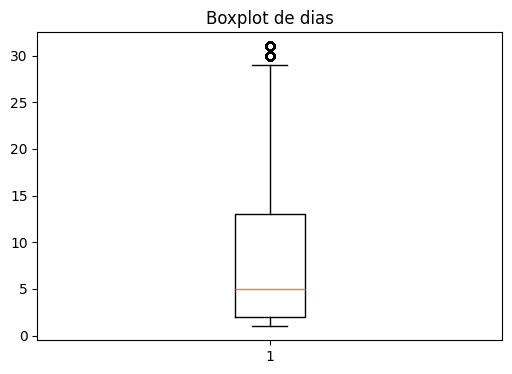

In [13]:
column_analysis(df_clean, 'dias', methods=['numeric_nulls', 'negative_values', 'zero_values', 'boxplot'])

--------------------------------------------------
Quantidade de nulos: 0
--------------------------------------------------
Quantidade de linhas que retornaram com valor negativo: 0
--------------------------------------------------
Quantidade de linhas que retornaram zero: 0
--------------------------------------------------
count    50689.000000
mean        56.689459
std        109.424394
min          1.000000
25%          4.000000
50%         15.000000
75%         58.000000
max       2143.000000
Name: pviews, dtype: float64


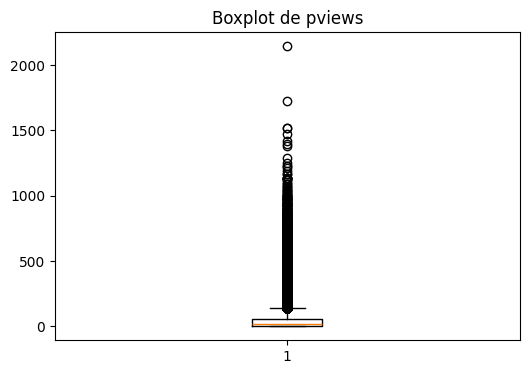

In [14]:
column_analysis(df_clean, 'pviews', methods=['numeric_nulls', 'negative_values', 'zero_values', 'boxplot'])

In [15]:
add_outlier_column('pviews')

Coluna 'pviews' adicionada aos outliers.


--------------------------------------------------
Quantidade de nulos: 0
--------------------------------------------------
Quantidade de linhas que retornaram com valor negativo: 0
--------------------------------------------------
Quantidade de linhas que retornaram zero: 0
--------------------------------------------------
count    50689.000000
mean        17.148415
std         24.828745
min          1.000000
25%          2.000000
50%          7.000000
75%         21.000000
max        277.000000
Name: visitas, dtype: float64


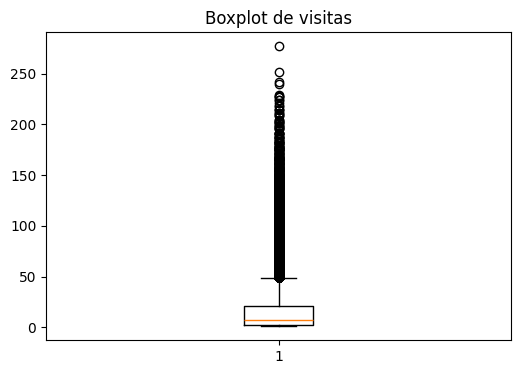

In [16]:
column_analysis(df_clean, 'visitas', methods=['numeric_nulls', 'negative_values', 'zero_values', 'boxplot'])

In [17]:
add_outlier_column('visitas')

Coluna 'visitas' adicionada aos outliers.


--------------------------------------------------
Quantidade de nulos: 0
--------------------------------------------------
Quantidade de linhas que retornaram com valor negativo: 0
--------------------------------------------------
Quantidade de linhas que retornaram zero: 0
--------------------------------------------------
count     50689.000000
mean      12637.405687
std       27908.554735
min          45.000000
25%         180.000000
50%        1671.576000
75%       10349.220999
max      225690.794000
Name: tempo_total, dtype: float64


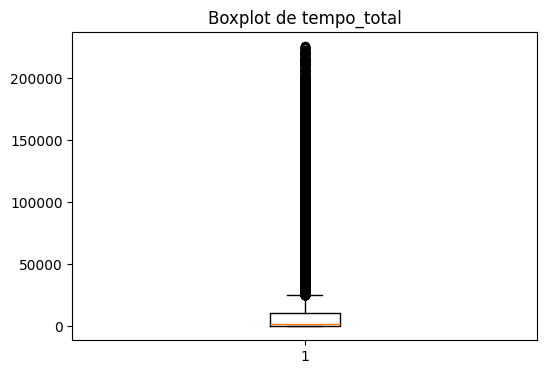

In [18]:
# tempo total em segundos
column_analysis(df_clean
                , 'tempo_total'
                , methods=['numeric_nulls', 'negative_values', 'zero_values', 'boxplot']
                )

In [30]:
# qual a mediana da coluna tempo_total?
seg_ = pd.to_numeric(df_clean['tempo_total']).median()
horas_ = seg_ / 3600

print('segundos', seg_.round(2))
print('horas', horas_.round(2))

segundos 1671.58
horas 0.46


In [31]:
add_outlier_column('tempo_total')

A coluna 'tempo_total' já está na lista de outliers.


--------------------------------------------------
Quantidade de nulos: 0
--------------------------------------------------
Quantidade de linhas que retornaram com valor negativo: 0
--------------------------------------------------
Quantidade de linhas que retornaram zero: 16576
--------------------------------------------------
count     50689.000000
mean       3937.687461
std       11090.160922
min           0.000000
25%           0.000000
50%         135.000000
75%        2366.065000
max      187225.147000
Name: futebol, dtype: float64


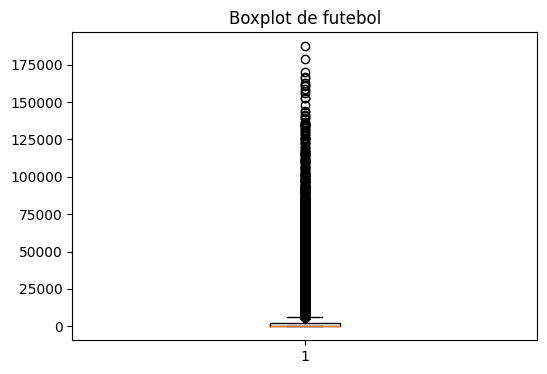

In [32]:
column_analysis(df_clean, 'futebol', methods=['numeric_nulls', 'negative_values', 'zero_values', 'boxplot'])

In [33]:
add_outlier_column('futebol')

Coluna 'futebol' adicionada aos outliers.


--------------------------------------------------
Quantidade de nulos: 0
--------------------------------------------------
Quantidade de linhas que retornaram com valor negativo: 0
--------------------------------------------------
Quantidade de linhas que retornaram zero: 39481
--------------------------------------------------
count     50689.000000
mean        274.015518
std        2155.114900
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      161337.180000
Name: futebol_intenacional, dtype: float64


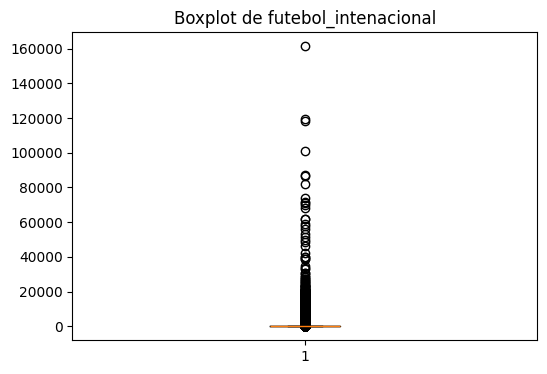

In [34]:
column_analysis(df_clean, 'futebol_intenacional', methods=['numeric_nulls', 'negative_values', 'zero_values', 'boxplot'])

In [35]:
add_outlier_column('futebol_intenacional')

Coluna 'futebol_intenacional' adicionada aos outliers.


--------------------------------------------------
Quantidade de nulos: 0
--------------------------------------------------
Quantidade de linhas que retornaram com valor negativo: 0
--------------------------------------------------
Quantidade de linhas que retornaram zero: 28570
--------------------------------------------------
count     50689.000000
mean       1156.293316
std        4146.357108
min           0.000000
25%           0.000000
50%           0.000000
75%         209.871000
max      176608.438000
Name: futebol_olimpico, dtype: float64


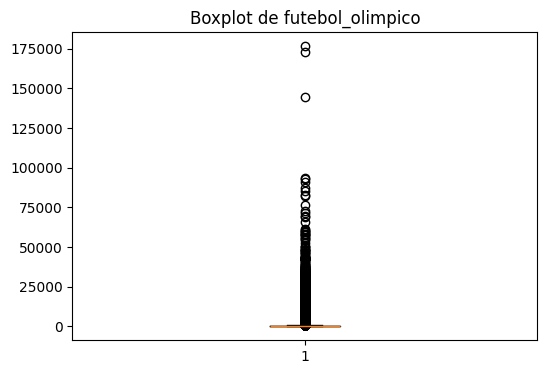

In [36]:
column_analysis(df_clean, 'futebol_olimpico', methods=['numeric_nulls', 'negative_values', 'zero_values', 'boxplot'])

In [37]:
add_outlier_column('futebol_olimpico')

Coluna 'futebol_olimpico' adicionada aos outliers.


--------------------------------------------------
Quantidade de nulos: 0
--------------------------------------------------
Quantidade de linhas que retornaram com valor negativo: 0
--------------------------------------------------
Quantidade de linhas que retornaram zero: 26734
--------------------------------------------------
count     50689.000000
mean        822.864136
std        4251.866684
min           0.000000
25%           0.000000
50%           0.000000
75%         199.010000
max      196982.898000
Name: blog_cartola, dtype: float64


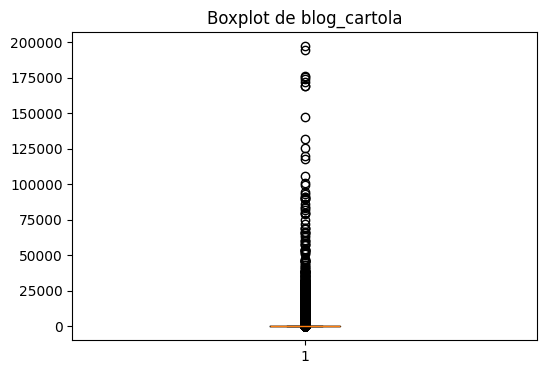

In [38]:
column_analysis(df_clean, 'blog_cartola', methods=['numeric_nulls', 'negative_values', 'zero_values', 'boxplot'])

In [39]:
add_outlier_column('blog_cartola')

Coluna 'blog_cartola' adicionada aos outliers.


Coluna: futebol
--------------------------------------------------
Quantidade de nulos: 0
--------------------------------------------------
Quantidade de linhas que retornaram com valor negativo: 0
--------------------------------------------------
Quantidade de linhas que retornaram zero: 16576
--------------------------------------------------
count     50689.000000
mean       3937.687461
std       11090.160922
min           0.000000
25%           0.000000
50%         135.000000
75%        2366.065000
max      187225.147000
Name: futebol, dtype: float64


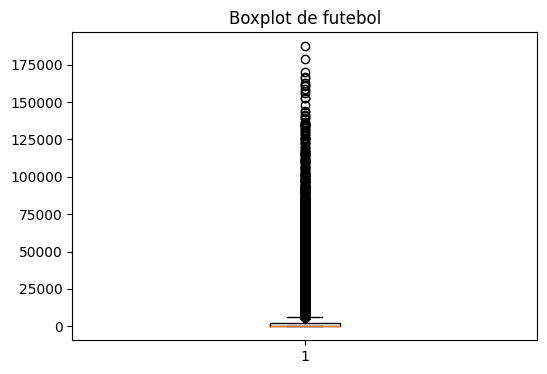

--------------------------------------------------
Coluna: futebol_intenacional
--------------------------------------------------
Quantidade de nulos: 0
--------------------------------------------------
Quantidade de linhas que retornaram com valor negativo: 0
--------------------------------------------------
Quantidade de linhas que retornaram zero: 39481
--------------------------------------------------
count     50689.000000
mean        274.015518
std        2155.114900
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      161337.180000
Name: futebol_intenacional, dtype: float64


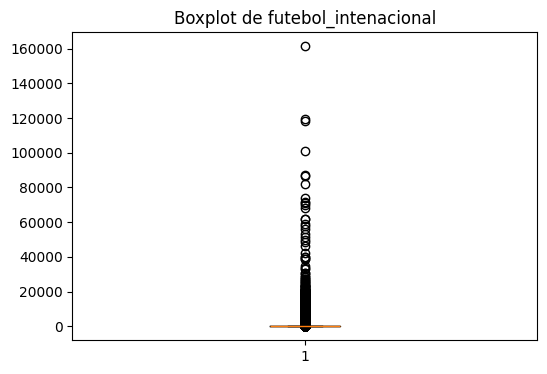

--------------------------------------------------
Coluna: futebol_olimpico
--------------------------------------------------
Quantidade de nulos: 0
--------------------------------------------------
Quantidade de linhas que retornaram com valor negativo: 0
--------------------------------------------------
Quantidade de linhas que retornaram zero: 28570
--------------------------------------------------
count     50689.000000
mean       1156.293316
std        4146.357108
min           0.000000
25%           0.000000
50%           0.000000
75%         209.871000
max      176608.438000
Name: futebol_olimpico, dtype: float64


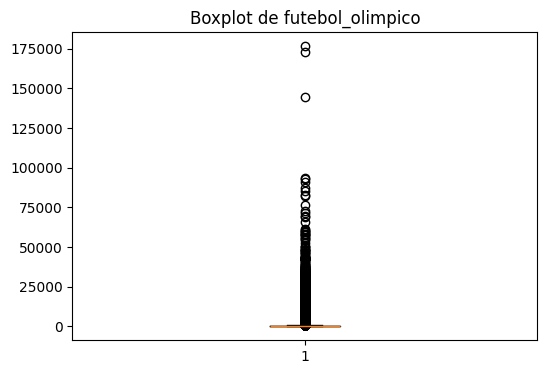

--------------------------------------------------
Coluna: blog_cartola
--------------------------------------------------
Quantidade de nulos: 0
--------------------------------------------------
Quantidade de linhas que retornaram com valor negativo: 0
--------------------------------------------------
Quantidade de linhas que retornaram zero: 26734
--------------------------------------------------
count     50689.000000
mean        822.864136
std        4251.866684
min           0.000000
25%           0.000000
50%           0.000000
75%         199.010000
max      196982.898000
Name: blog_cartola, dtype: float64


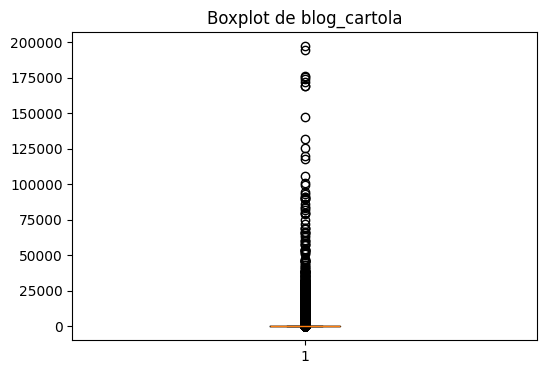

--------------------------------------------------
Coluna: atletismo
--------------------------------------------------
Quantidade de nulos: 0
--------------------------------------------------
Quantidade de linhas que retornaram com valor negativo: 0
--------------------------------------------------
Quantidade de linhas que retornaram zero: 37936
--------------------------------------------------
count     50689.000000
mean        347.241928
std        2025.333697
min           0.000000
25%           0.000000
50%           0.000000
75%           8.068000
max      104413.659000
Name: atletismo, dtype: float64


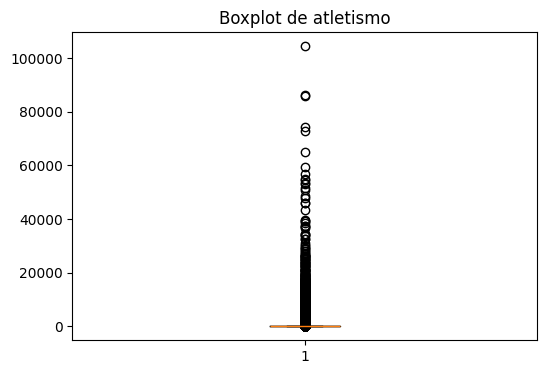

--------------------------------------------------
Coluna: ginastica
--------------------------------------------------
Quantidade de nulos: 0
--------------------------------------------------
Quantidade de linhas que retornaram com valor negativo: 0
--------------------------------------------------
Quantidade de linhas que retornaram zero: 39548
--------------------------------------------------
count     50689.000000
mean        312.669947
std        2097.682553
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      144959.699000
Name: ginastica, dtype: float64


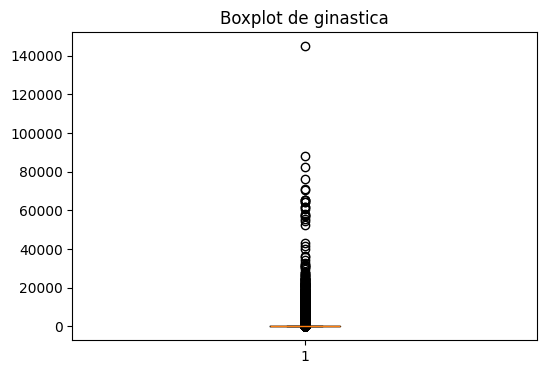

--------------------------------------------------
Coluna: judo
--------------------------------------------------
Quantidade de nulos: 0
--------------------------------------------------
Quantidade de linhas que retornaram com valor negativo: 0
--------------------------------------------------
Quantidade de linhas que retornaram zero: 41654
--------------------------------------------------
count    50689.000000
mean       340.631099
std       2370.173172
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      94089.566000
Name: judo, dtype: float64


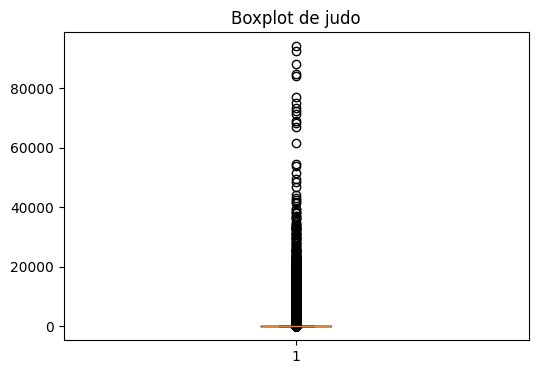

--------------------------------------------------
Coluna: natacao
--------------------------------------------------
Quantidade de nulos: 0
--------------------------------------------------
Quantidade de linhas que retornaram com valor negativo: 0
--------------------------------------------------
Quantidade de linhas que retornaram zero: 40009
--------------------------------------------------
count     50689.000000
mean        297.421513
std        2275.266761
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      170804.685000
Name: natacao, dtype: float64


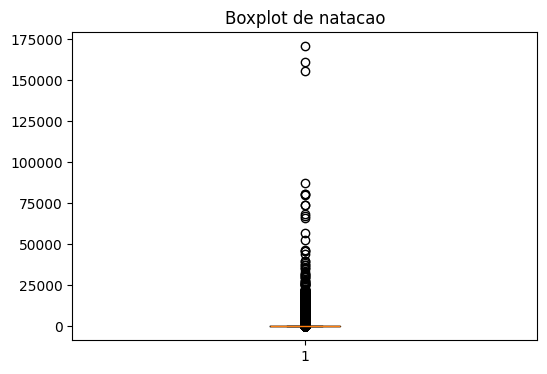

--------------------------------------------------
Coluna: basquete
--------------------------------------------------
Quantidade de nulos: 0
--------------------------------------------------
Quantidade de linhas que retornaram com valor negativo: 0
--------------------------------------------------
Quantidade de linhas que retornaram zero: 41058
--------------------------------------------------
count     50689.000000
mean        282.900358
std        1862.177775
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      115990.668000
Name: basquete, dtype: float64


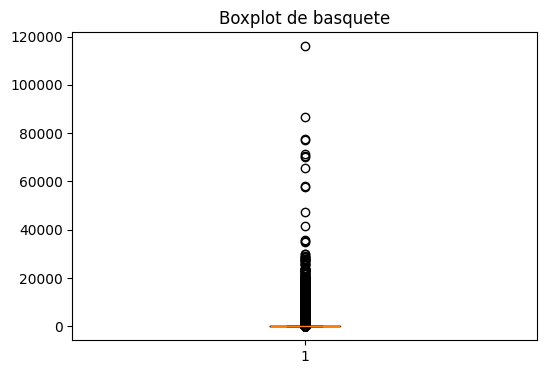

--------------------------------------------------
Coluna: handebol
--------------------------------------------------
Quantidade de nulos: 0
--------------------------------------------------
Quantidade de linhas que retornaram com valor negativo: 0
--------------------------------------------------
Quantidade de linhas que retornaram zero: 43129
--------------------------------------------------
count     50689.000000
mean        251.781360
std        1693.323186
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      104274.176000
Name: handebol, dtype: float64


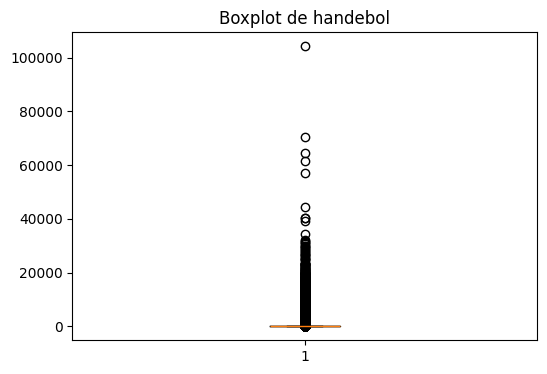

--------------------------------------------------
Coluna: volei
--------------------------------------------------
Quantidade de nulos: 0
--------------------------------------------------
Quantidade de linhas que retornaram com valor negativo: 0
--------------------------------------------------
Quantidade de linhas que retornaram zero: 40490
--------------------------------------------------
count    50689.000000
mean       230.384103
std       1528.322303
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      90985.219000
Name: volei, dtype: float64


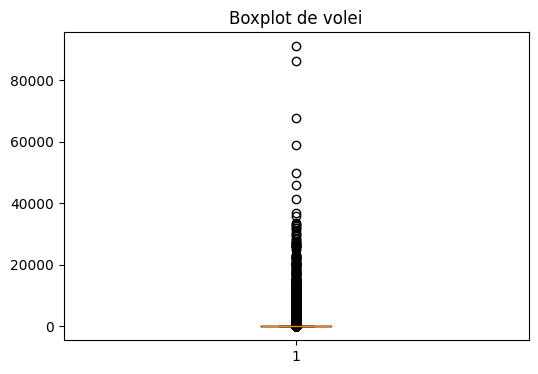

--------------------------------------------------
Coluna: tenis
--------------------------------------------------
Quantidade de nulos: 0
--------------------------------------------------
Quantidade de linhas que retornaram com valor negativo: 0
--------------------------------------------------
Quantidade de linhas que retornaram zero: 44154
--------------------------------------------------
count    50689.000000
mean       138.543421
std       1090.553805
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      84894.916000
Name: tenis, dtype: float64


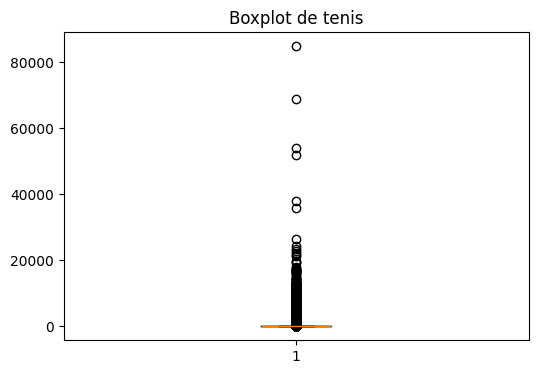

--------------------------------------------------
Coluna: canoagem
--------------------------------------------------
Quantidade de nulos: 0
--------------------------------------------------
Quantidade de linhas que retornaram com valor negativo: 0
--------------------------------------------------
Quantidade de linhas que retornaram zero: 44723
--------------------------------------------------
count     50689.000000
mean        141.100257
std        1256.204387
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      106953.499000
Name: canoagem, dtype: float64


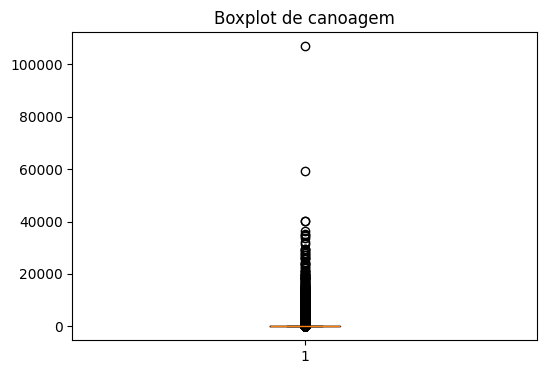

--------------------------------------------------
Coluna: saltos_ornamentais
--------------------------------------------------
Quantidade de nulos: 0
--------------------------------------------------
Quantidade de linhas que retornaram com valor negativo: 0
--------------------------------------------------
Quantidade de linhas que retornaram zero: 43248
--------------------------------------------------
count    50689.000000
mean       114.685967
std       1040.395728
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      84184.831000
Name: saltos_ornamentais, dtype: float64


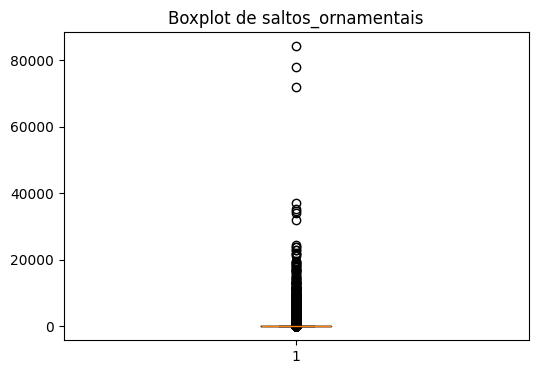

--------------------------------------------------


In [40]:
esportes = [
    'futebol',
    'futebol_intenacional',
    'futebol_olimpico',
    'blog_cartola',
    'atletismo',
    'ginastica',
    'judo',
    'natacao',
    'basquete',
    'handebol',
    'volei',
    'tenis',
    'canoagem',
    'saltos_ornamentais',
]

for col in esportes:
    print('Coluna:', col)
    column_analysis(df_clean, col, methods=['numeric_nulls', 'negative_values', 'zero_values', 'boxplot'])
    print('--'*25)

In [41]:
for col_ in esportes:
    add_outlier_column(col_)

A coluna 'futebol' já está na lista de outliers.
A coluna 'futebol_intenacional' já está na lista de outliers.
A coluna 'futebol_olimpico' já está na lista de outliers.
A coluna 'blog_cartola' já está na lista de outliers.
Coluna 'atletismo' adicionada aos outliers.
Coluna 'ginastica' adicionada aos outliers.
Coluna 'judo' adicionada aos outliers.
Coluna 'natacao' adicionada aos outliers.
Coluna 'basquete' adicionada aos outliers.
Coluna 'handebol' adicionada aos outliers.
Coluna 'volei' adicionada aos outliers.
Coluna 'tenis' adicionada aos outliers.
Coluna 'canoagem' adicionada aos outliers.
Coluna 'saltos_ornamentais' adicionada aos outliers.


--------------------------------------------------
Quantidade de nulos: 0
--------------------------------------------------
Quantidade de linhas que retornaram com valor negativo: 0
--------------------------------------------------
Quantidade de linhas que retornaram zero: 0
--------------------------------------------------
count     50689.000000
mean      12637.405687
std       27908.554735
min          45.000000
25%         180.000000
50%        1671.576000
75%       10349.220999
max      225690.794000
Name: tempo_total, dtype: float64


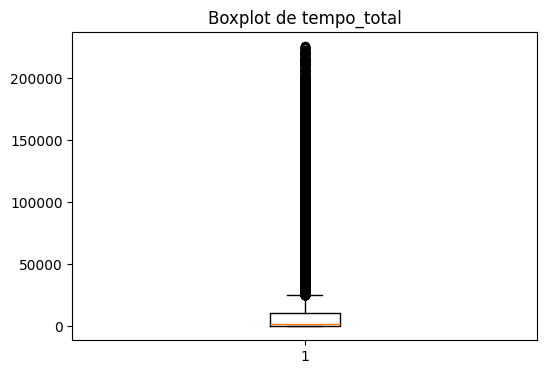

In [42]:
column_analysis(df_clean, 'tempo_total', methods=['numeric_nulls', 'negative_values', 'zero_values', 'boxplot'])

In [43]:
add_outlier_column('tempo_total')

A coluna 'tempo_total' já está na lista de outliers.


In [46]:
column_analysis(df_clean, 'device', methods=['unique', 'value_counts'])

Quantidade de valores únicos: 3
['pc_e_m' 'pc_only' 'm_only']
--------------------------------------------------
Value counts: device
pc_only    23929
m_only     16053
pc_e_m     10707
Name: count, dtype: int64


--------------------------------------------------
Quantidade de nulos: 0
--------------------------------------------------
Quantidade de linhas que retornaram com valor negativo: 0
--------------------------------------------------
Quantidade de linhas que retornaram zero: 24589
--------------------------------------------------
count     50689.000000
mean       1931.810051
std        7109.661917
min           0.000000
25%           0.000000
50%          13.565000
75%         569.675000
max      192745.565000
Name: home, dtype: float64


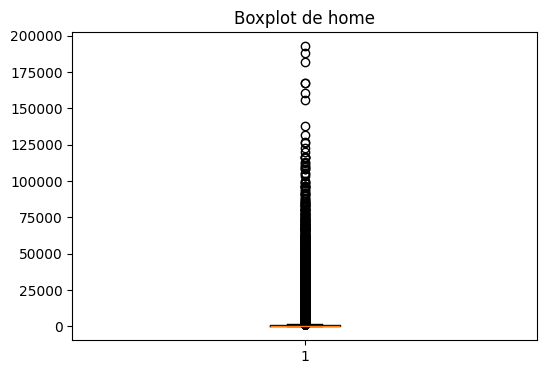

In [47]:
column_analysis(df_clean, 'home', methods=['numeric_nulls', 'negative_values', 'zero_values', 'boxplot'])

--------------------------------------------------
Quantidade de nulos: 0
--------------------------------------------------
Quantidade de linhas que retornaram com valor negativo: 0
--------------------------------------------------
Quantidade de linhas que retornaram zero: 29686
--------------------------------------------------
count     50689.00000
mean        650.79972
std        3009.07565
min           0.00000
25%           0.00000
50%           0.00000
75%         129.13200
max      101053.63500
Name: home_olimpiadas, dtype: float64


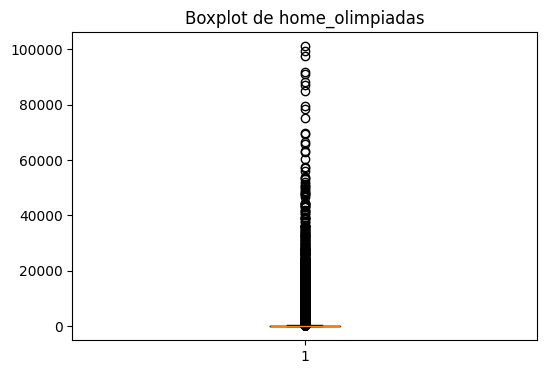

In [48]:
column_analysis(df_clean, 'home_olimpiadas', methods=['numeric_nulls', 'negative_values', 'zero_values', 'boxplot'])

In [49]:
add_outlier_column('home')
add_outlier_column('home_olimpiadas')

Coluna 'home' adicionada aos outliers.
Coluna 'home_olimpiadas' adicionada aos outliers.


In [50]:
column_analysis(df_clean, 'cartola_status', methods=['unique', 'value_counts'])

Quantidade de valores únicos: 4
['NÃ£o Cartola' 'Cartola Free' 'Cartola Pro' 'NA']
--------------------------------------------------
Value counts: cartola_status
Cartola Free    29019
NA              18257
NÃ£o Cartola     2336
Cartola Pro      1077
Name: count, dtype: int64


In [65]:
df_clean['idade'] = pd.to_numeric(df_clean['idade'], errors='coerce')
df_clean = df_clean[df_clean['idade'] > 0]

In [124]:
idade = 10

users = df_clean[df_clean['idade'] <= idade]['user'].nunique()
print(f'quantidade de usuários <= {idade} anos: {users}')

representatividade_10y = 100 * users / df_clean['user'].nunique()
print(f'representatividade na base: {representatividade_10y:.2} %')

(
    df_clean[df_clean['idade'] <= idade]['cartola_status']
    .value_counts()
)

quantidade de usuários <= 10 anos: 97
representatividade na base: 0.43 %


cartola_status
Cartola Free    68
NA              29
Name: count, dtype: int64

In [130]:
idade = 90

users = df_clean[df_clean['idade'] >= idade]['user'].nunique()
print(f'quantidade de usuários >= {idade} anos: {users}')

representatividade_10y = 100 * users / df_clean['user'].nunique()
print(f'representatividade na base: {representatividade_10y:.2} %')

(
    df_clean[df_clean['idade'] >= idade]['cartola_status']
    .value_counts()
)

quantidade de usuários >= 90 anos: 26
representatividade na base: 0.11 %


cartola_status
Cartola Free    17
NA               9
Name: count, dtype: int64

In [132]:
idade = 100

users = df_clean[df_clean['idade'] >= idade]['user'].nunique()
print(f'quantidade de usuários >= {idade} anos: {users}')

representatividade_10y = 100 * users / df_clean['user'].nunique()
print(f'representatividade na base: {representatividade_10y:.2} %')

(
    df_clean[df_clean['idade'] >= idade]['cartola_status']
    .value_counts()
)

quantidade de usuários >= 100 anos: 23
representatividade na base: 0.1 %


cartola_status
Cartola Free    15
NA               8
Name: count, dtype: int64

Definição: vamos trabalhar com idades entre 10 a 90 anos.
A eliminação dos outliers com idade acima de 90 anos é justificada, pois representam apenas 0,1% da base e nenhum deles possui o plano Cartola PRO. Isso distorce a análise, que visa identificar padrões de migração de usuários do plano Free para o PRO. Trabalhar com a faixa etária de 10 a 90 anos permite focar em um grupo com melhor qualidade dos dados.

Verificação de duplicatas

Estatísticas básicas dos dados numéricos

Verificação de outliers

Verificação de correlação entre variáveis numéricas

Balanceamento de classes (importante para cartola_status)

Verificação de consistência lógica